In [1]:
# trf_collector.py
# Avery Krieger 11/2022

# argumenmts: [1] date (yyyy-mm-dd); [2] series_number; [3] roi_set_name
# implementation: save_strfs.py 2022-03-17 1 roi_set_postfrom visanalysis.analysis import imaging_data, shared_analysis

import os
from pathlib import Path

import matplotlib.patches as mpatches  # for the legend patches
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
from scipy import interpolate
from two_photon_analysis import medulla_analysis as ma
from visanalysis.analysis import imaging_data, shared_analysis

import pyfiglet

In [23]:
#Initialize relevant variables
experiment_file_directory_stem = "/Volumes/ROG2TBAK/data/bruker/"
experiment_file_directory = "/Volumes/ROG2TBAK/data/bruker/20221025"

# create save directory
save_directory = "/Volumes/ROG2TBAK/data/bruker/trfs/"
print(save_directory)
Path(save_directory).mkdir(exist_ok=True)

filter_length = 2
dff = False
savefig = True

/Volumes/ROG2TBAK/data/bruker/trfs/


In [3]:
# Set ideal frame rate
ideal_frame_rate = 120 #Hz
filter_size = filter_length*ideal_frame_rate

In [30]:
# Mi1 Experiments
mi1_exp0 = [["/Volumes/ROG2TBAK/data/bruker/20221025", "2022-10-25", "1", "Mi1_proximal_mixed"]]
mi1_exp1 = [["/Volumes/ROG2TBAK/data/bruker/20221027", "2022-10-27", "3", "Mi1_proximal_mixed"]]
mi1_exp2 = [["/Volumes/ROG2TBAK/data/bruker/20221027", "2022-10-27", "5", "Mi1_proximal_mixed"]]

expts = np.concatenate(
                       (mi1_exp1, mi1_exp2), 
                       axis = 0
                      )

In [ ]:
# L2 Experiments
l2_exp0 = [["/Volumes/ROG2TBAK/data/bruker/20221101", "2022-11-01", "2", "L2_modulated"]]
l2_exp1 = [["/Volumes/ROG2TBAK/data/bruker/20221101", "2022-11-01", "6", "L2_modulated"]]

expts = np.concatenate(
                       (l2_exp0, l2_exp1), 
                       axis = 0
                      )

In [31]:
# Running the trfMaker function from medulla_analysis across experiments
# initialize all the arrays
roi_mean_trf = np.empty(shape=[0, filter_size])
nopto_mean_trf = np.empty(shape=[0, filter_size])
nopto_sem_plus = np.empty(shape=[0, filter_size])
nopto_sem_minus = np.empty(shape=[0, filter_size])
yopto_mean_trf = np.empty(shape=[0, filter_size])
yopto_sem_plus = np.empty(shape=[0, filter_size])
yopto_sem_minus = np.empty(shape=[0, filter_size])

ascii_banner = pyfiglet.figlet_format("Temporal Receptive Field Generator")
print('\n----------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------')
print(ascii_banner)
print('----------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------\n\n')

for exp in range(0, len(expts)):
    print(f'-------Started Experiment {exp+1} of {len(expts)}!-------\n')
    
    (exp_roi_mean_trf, exp_nopto_mean_trf, exp_nopto_sem_plus, exp_nopto_sem_minus, 
    exp_yopto_mean_trf, exp_yopto_sem_plus, exp_yopto_sem_minus) = \
    ma.trfMaker(expts[exp, 0], expts[exp, 1], expts[exp, 2], expts[exp, 3], 
             filter_length, dff, savefig
            )
    
    # append to big array
    roi_mean_trf = np.append(roi_mean_trf, exp_roi_mean_trf, axis = 0)
    nopto_mean_trf = np.append(nopto_mean_trf, exp_nopto_mean_trf, axis = 0)           
    nopto_sem_plus = np.append(nopto_sem_plus, exp_nopto_sem_plus, axis = 0)
    nopto_sem_minus = np.append(nopto_sem_minus, exp_nopto_sem_minus, axis = 0)
    yopto_mean_trf = np.append(yopto_mean_trf, exp_yopto_mean_trf, axis = 0)
    yopto_sem_plus = np.append(yopto_sem_plus, exp_yopto_sem_plus, axis = 0)
    yopto_sem_minus = np.append(yopto_sem_minus, exp_yopto_sem_minus, axis = 0)
    
    
ascii_banner = pyfiglet.figlet_format("FINITO")
print('\n----------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------')
print(ascii_banner)
print('----------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------')


----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
 _____                                    _ 
|_   _|__ _ __ ___  _ __   ___  _ __ __ _| |
  | |/ _ \ '_ ` _ \| '_ \ / _ \| '__/ _` | |
  | |  __/ | | | | | |_) | (_) | | | (_| | |
  |_|\___|_| |_| |_| .__/ \___/|_|  \__,_|_|
                   |_|                      
 ____                     _   _             _____ _      _     _ 
|  _ \ ___  ___ ___ _ __ | |_(_)_   _____  |  ___(_) ___| | __| |
| |_) / _ \/ __/ _ \ '_ \| __| \ \ / / _ \ | |_  | |/ _ \ |/ _` |
|  _ <  __/ (_|  __/ |_) | |_| |\ V /  __/ |  _| | |  __/ | (_| |
|_| \_\___|\___\___| .__/ \__|_| \_/ \___| |_|   |_|\___|_|\__,_|
                   |_|                                           
 

In [34]:
nopto_mean_trf.shape


(43, 240)

In [32]:
# Run function to average across ROIs
(across_roi_nopto_trf, across_roi_nopto_sem_plus, across_roi_nopto_sem_minus, 
 across_roi_yopto_trf,across_roi_yopto_sem_plus, across_roi_yopto_sem_minus) = \
 ma.avgAcrossROIs(nopto_mean_trf, nopto_sem_plus, nopto_sem_minus, 
               yopto_mean_trf, yopto_sem_plus, yopto_sem_minus)

NameError: name 'mpatches' is not defined

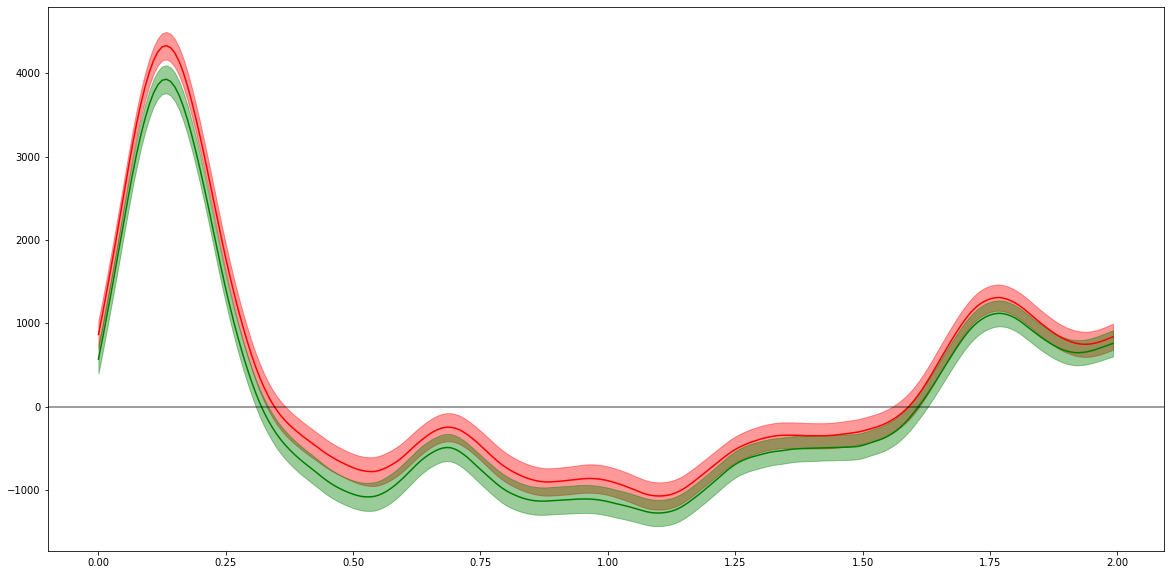

In [33]:
# Let's get plotty!
ma.plotSingleTRFComparison(
                  across_roi_nopto_trf, across_roi_nopto_sem_plus, across_roi_nopto_sem_minus,
                  across_roi_yopto_trf, across_roi_yopto_sem_plus, across_roi_yopto_sem_minus,
                  filter_len = filter_size, ideal_frame_rate = 120, savefig = False
                 )

In [10]:
# SEM Plot for single ROIs!
def plotSingleTRFComparison(
                  nopto_trf, nopto_sem_plus, nopto_sem_minus,
                  yopto_trf, yopto_sem_plus, yopto_sem_minus,
                  filter_len, ideal_frame_rate = 120, savefig = False
                 ):
    fh, ax = plt.subplots(1, 1, figsize=(20, 10))
    #time = np.arange(0, roi_trfs.shape[1])
    filter_time = np.flip(np.arange(0, filter_len) * 1/ideal_frame_rate)

    ax.plot(filter_time, yopto_trf, color="r")
    ax.fill_between(filter_time, yopto_sem_plus, yopto_sem_minus, color="r", alpha=0.4)
    ax.plot(filter_time, nopto_trf, color="g")
    ax.fill_between(filter_time, nopto_sem_plus, nopto_sem_minus, color="g", alpha=0.4)
    ax.axhline(y=0, color="k", alpha=0.5)
    red_patch = mpatches.Patch(color="red", label="Opto Condition")
    green_patch = mpatches.Patch(color="green", label="No Opto Condition")

    ax.legend(handles=[green_patch, red_patch], fontsize=20)
    ax.set_title(
                 f"Temporal Receptive Field for averaged ROIs | Filter Length: {filter_length}",
                 fontsize=25,
    )
    ax.set_xlabel("Time (s)", fontweight="bold", fontsize=13)
    ax.grid(True)

    if savefig == True:
        fh.savefig(
            save_directory
            + "Cross-ROI.TemporalReceptiveField."
            + "FilterLength="
            + str(filter_length)
            + ".pdf",
            dpi=300,
        )

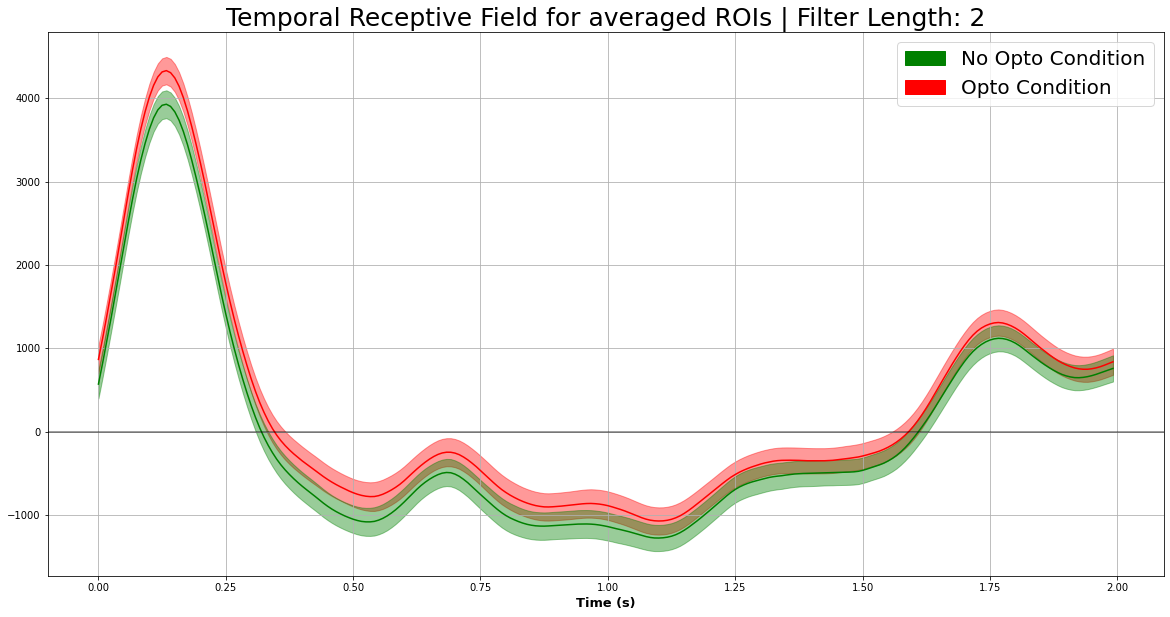

In [35]:
plotSingleTRFComparison(
                  across_roi_nopto_trf, across_roi_nopto_sem_plus, across_roi_nopto_sem_minus,
                  across_roi_yopto_trf, across_roi_yopto_sem_plus, across_roi_yopto_sem_minus,
                  filter_len = filter_size, savefig = False
                 )

In [47]:
across_roi_nopto_trf.shape

(240,)

In [26]:
# SEM Plot for multiple ROIs!
def plotMultipleTRFComparisons(
                               nopto_mean_trf, nopto_sem_plus, nopto_sem_minus,
                               yopto_mean_trf, yopto_sem_plus, yopto_sem_minus,
                               filter_len, ideal_frame_rate = 120, savefig = False
                              ):
    roi_count = nopto_mean_trf.shape[0]

    fh, ax = plt.subplots(roi_count, 1, figsize=(10,roi_count*5))
    #time = np.arange(0, roi_trfs.shape[1])
    filter_time = np.flip(np.arange(0, filter_len) * 1/ideal_frame_rate)
    for roi_ind in range(0, roi_count):
        ax[roi_ind].plot(filter_time, yopto_mean_trf[roi_ind], color="r")
        ax[roi_ind].fill_between(filter_time, yopto_sem_plus[roi_ind], yopto_sem_minus[roi_ind], color="r", alpha=0.4)
        ax[roi_ind].plot(filter_time, nopto_mean_trf[roi_ind], color="g")
        ax[roi_ind].fill_between(filter_time, nopto_sem_plus[roi_ind], nopto_sem_minus[roi_ind], color="g", alpha=0.4)
        ax[roi_ind].axhline(y=0, color="k", alpha=0.5)
        red_patch = mpatches.Patch(color="red", label="Opto Condition")
        green_patch = mpatches.Patch(color="green", label="No Opto Condition")

        ax[roi_ind].legend(handles=[green_patch, red_patch], fontsize=12)
        ax[roi_ind].set_title(f' ROI: {roi_ind}', fontsize=10)

        ax[roi_ind].set_xlabel("Time (s)", fontsize=11)
        ax[roi_ind].grid(True)

    if savefig == True:
        fh.savefig(
            save_directory
            + "Each-ROI.TemporalReceptiveField"
            + ".pdf",
            dpi=300,
        )

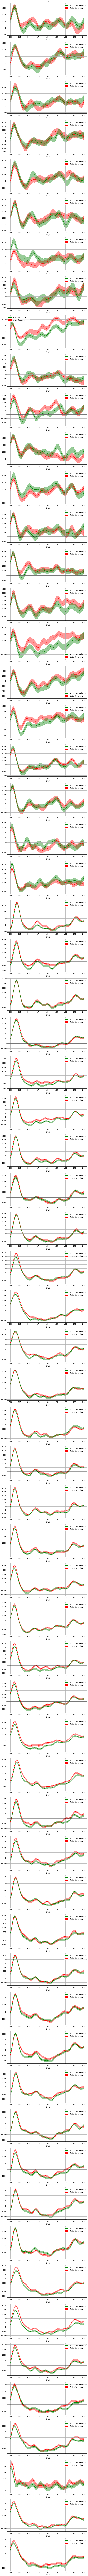

In [27]:
plotMultipleTRFComparisons(nopto_mean_trf, nopto_sem_plus, nopto_sem_minus,
                           yopto_mean_trf, yopto_sem_plus, yopto_sem_minus,
                           filter_len = filter_size, ideal_frame_rate = 120, savefig = True)

In [ ]:
|